In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift
from scipy.signal.windows import hann, flattop

In [2]:
f1 = 300 # Hz
f2 = 300.25 # Hz
f3 = 299.75 #Hz
fs = 400 # Hz
N = 2000
k = np.arange(N)
x1 = 3* np.sin(2*np.pi*f1/fs*k)
x2 = 3 * np.sin(2*np.pi*f2/fs*k )
x3 = 3 * np.sin(2*np.pi*f3/fs*k )

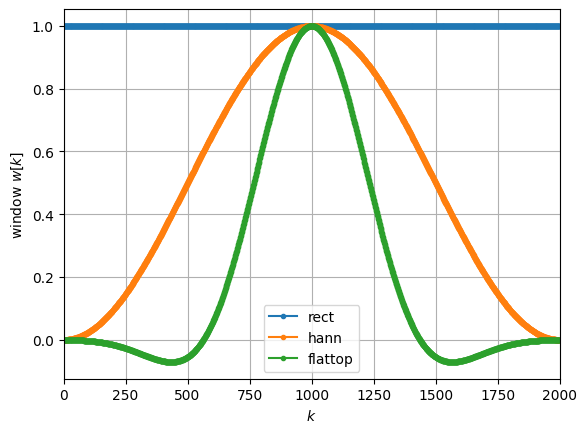

In [3]:
wrect = np.ones(N)
whann = hann(N,sym=False)
wflattop = flattop(N, sym=False)
plt.plot(wrect, 'C0o-', ms=3, label='rect')
plt.plot(whann, 'C1o-', ms=3, label='hann')
plt.plot(wflattop, 'C2o-', ms=3, label='flattop')
plt.xlabel(r'$k$')
plt.ylabel(r'window $w [ k ] $')
plt.xlim(0, N)
plt.legend()
plt.grid(True)

In [4]:
X1wrect = fft(x1)
X2wrect = fft(x2)
X3wrect = fft(x3)
X1whann = fft(x1*whann)
X2whann = fft(x2*whann)
X3whann = fft(x3*whann)
X1wflattop = fft(x1*wflattop)
X2wflattop = fft(x2*wflattop)
X3wflattop = fft(x3*wflattop)

In [5]:
def fft2db(X):
    N = X.size
    Xtmp = 2/N*X
    Xtmp[0] *= 1/2
    if N%2 == 0:
        Xtmp[N//2] = Xtmp[N//2]/2
    return 20*np.log10(np.abs(Xtmp))

In [6]:
df = fs/N
f = np.arange(N)*df

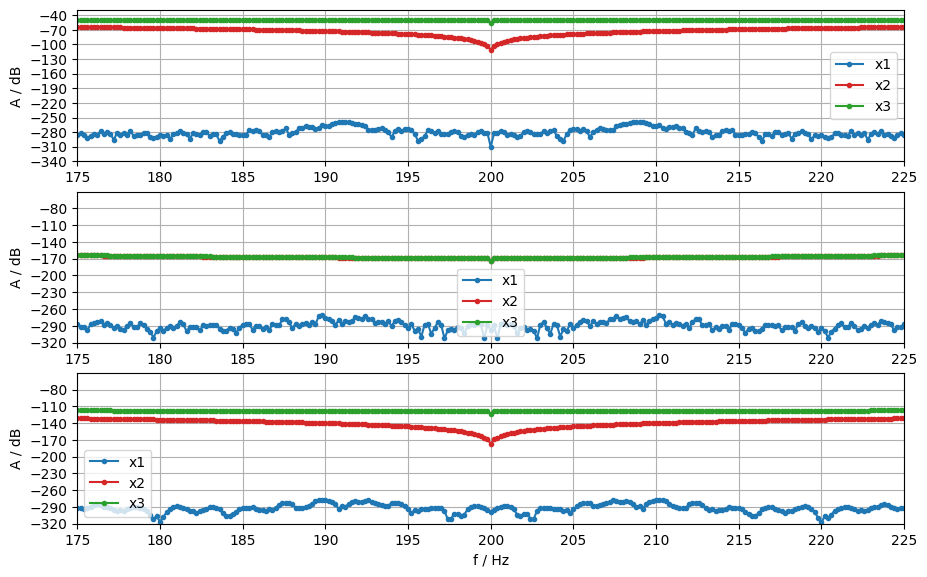

In [16]:
plt.figure(figsize = (16/1.5, 10/1.5))
plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X1wrect), 'C0o-', ms=3, label='x1')
plt.plot(f, fft2db(X2wrect), 'C3o-', ms=3, label='x2')
plt.plot(f, fft2db(X3wrect), 'C2o-', ms=3, label='x3')
plt.xlim(175, 225)
plt.ylim(-340, -30)
plt.xticks(np.arange(175, 230, 5))
plt.yticks(np.arange(-340, -30, 30))
plt.legend()
plt.ylabel('A / dB')
plt.grid(True)
plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X1whann), 'C0o-', ms=3, label='x1')
plt.plot(f, fft2db(X2whann), 'C3o-', ms=3, label='x2')
plt.plot(f, fft2db(X3whann), 'C2o-', ms=3, label='x3')
plt.xlim(175, 225)
plt.ylim(-320, -50)
plt.xticks(np.arange(175, 230, 5))
plt.yticks(np.arange(-320, -50, 30))
plt.legend()
plt.ylabel('A / dB')
plt.grid(True)
plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X1wflattop), 'C0o-', ms=3, label='x1')
plt.plot(f, fft2db(X2wflattop), 'C3o-', ms=3, label='x2')
plt.plot(f, fft2db(X3wflattop), 'C2o-', ms=3, label='x3')
plt.xlim(175, 225)
plt.ylim(-320, -50)
plt.xticks(np.arange(175, 230, 5))
plt.yticks(np.arange(-320, -50, 30))
plt.legend()
plt.xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)


In [8]:
def winDTFTdB(w):
    N = w.size
    Nz = 100*N
    W = np.zeros(Nz)
    W[0:N] = w
    W = np.abs(fftshift(fft(W)))
    W /= np.max(W)
    np.seterr(divide = 'ignore') 
    W = 20*np.log10(W)
    Omega = 2*np.pi/Nz*np.arange(Nz)-np.pi
    return Omega, W

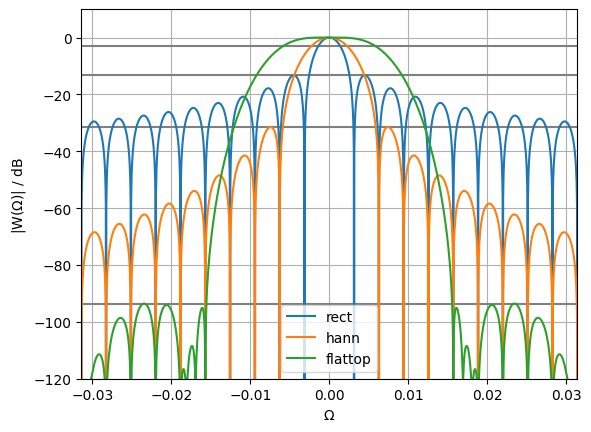

In [9]:
plt.plot([-np.pi, +np.pi], [-3.01, -3.01], 'gray')
plt.plot([-np.pi, +np.pi], [-13.3, -13.3], 'gray')
plt.plot([-np.pi, +np.pi], [-31.5, -31.5], 'gray')
plt.plot([-np.pi, +np.pi], [-93.6, -93.6], 'gray')
Omega, W = winDTFTdB(wrect)
plt.plot(Omega, W, label='rect')
Omega, W = winDTFTdB(whann)
plt.plot(Omega, W, label='hann')
Omega, W = winDTFTdB(wflattop)
plt.plot(Omega, W, label='flattop')
plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 10)
plt.xlim(-np.pi/100, np.pi/100)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'|W($\Omega$)| / dB')
plt.legend()
plt.grid(True)